In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

In [2]:
covid = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/UnitedStates_COVID_19_dataset/csse_covid_19_daily_reports_us.csv")
covid

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [8]:
covid.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Text(0.5, 1.0, 'Confirmed cases')

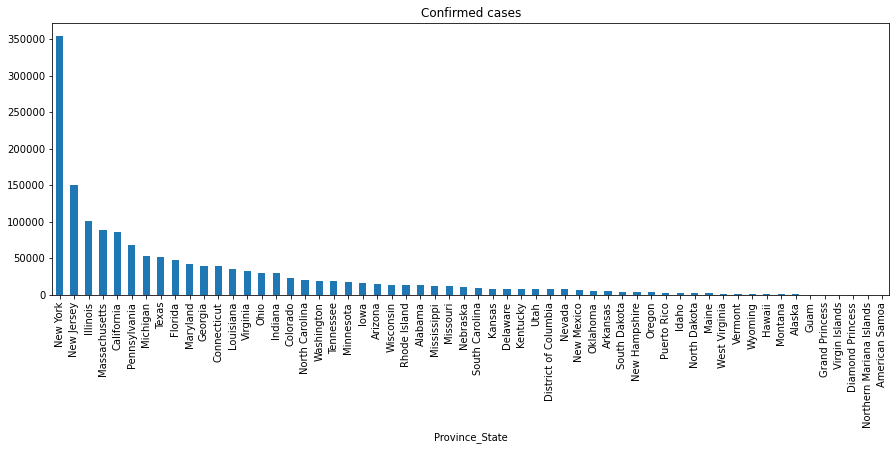

In [5]:
covid.groupby("Province_State")["Confirmed"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Confirmed cases')

As we can see from the chart, New Yok has most confirmed cases and American Samoa has the least

Text(0.5, 1.0, 'Deaths')

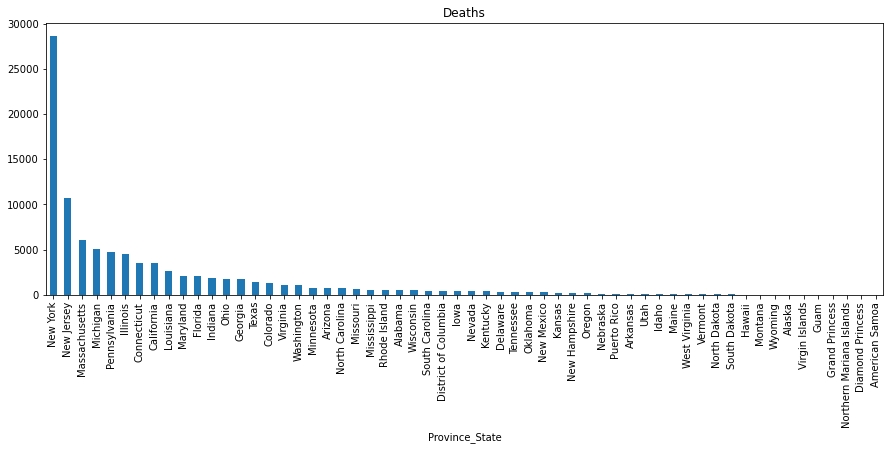

In [6]:
covid.groupby("Province_State")["Deaths"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Deaths')

as in the case of confirmed cases, New York tops the list when it comes to no. of deaths as well and American Samoa is in the bottom of the list. So as the confirmed cases increases, death also increases

Text(0.5, 1.0, 'Recovered')

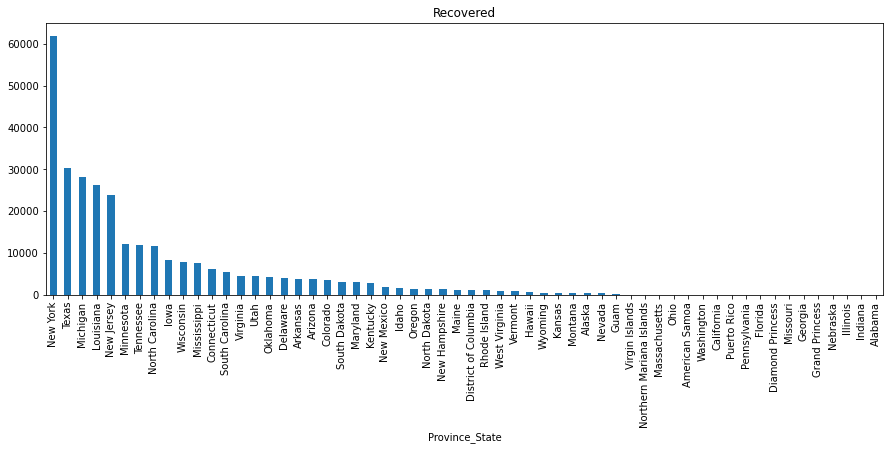

In [9]:
covid.groupby("Province_State")["Recovered"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Recovered')

New Yok has most recovered cases and Alabama has the least

Text(0.5, 1.0, 'Mortality Rate')

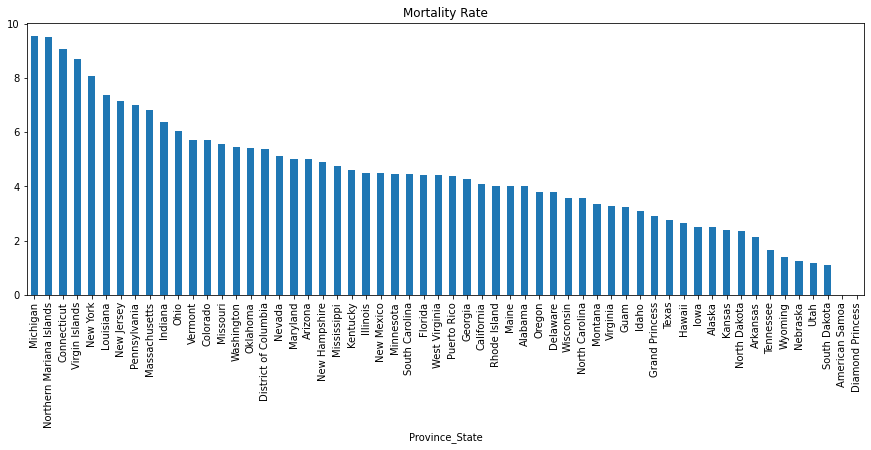

In [10]:
covid.groupby("Province_State")["Mortality_Rate"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Mortality Rate')

Mortality rate is highest in Michigan and the lowest in Diamond Princess

Text(0.5, 1.0, 'Active Cases')

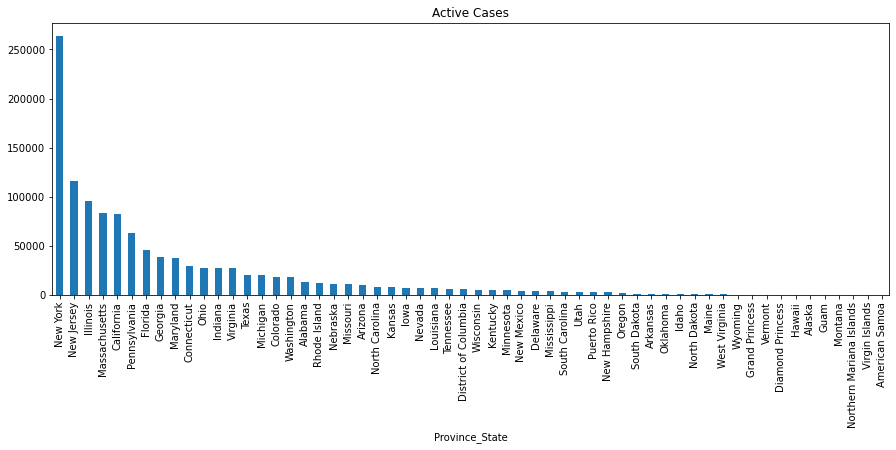

In [30]:
covid.groupby("Province_State")["Active"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Active Cases')

New Yok has most active cases and American Samoa has the least

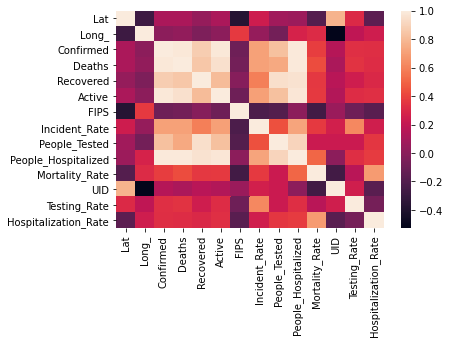

In [25]:
sns.heatmap(covid.corr())

Confirmed, recovered, active, incident rate, people tested, people hospitalized columns have very high correlation to deathtesting rate and hospitalization rate columns have decent correlation. People hospitalized has very high correlation to death. May be because only people in serious condition are hospitalized